In [1]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")
meeting_data_path = (
    "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/meetings/"
)

[2024-04-21 10:02:37,871][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2024-04-21 10:02:39,685][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [33]:
# ratinfo = dj.create_virtual_module("intfo", "ratinfo")
# rat_names = (ratinfo.Rats & {"israt = 1"} & {"experimenter": "JessB"}).fetch("ratname")
# date_min, date_max = dju.return_date_window(n_days_back=365)


In [ ]:
# trials_df = create_trials_df_from_dj(
#     animal_ids=rat_names.tolist(), date_min=date_min, date_max=date_max
# )


In [ ]:
# animals2 = [
#     "C214",
#     "C215",
#     "C220",
#     "C221",
#     "C222",
#     "C223",
# ]

# trials_df2 = create_trials_df_from_dj(
#     animal_ids=animals2, date_min="2023-08-18", date_max=date_max
# )

# trials_df = pd.concat([trials_df, trials_df2], ignore_index=True)

In [46]:
trials_df = pd.concat([trials_df, trials_df2], ignore_index=True)
trials_df.to_csv(meeting_data_path + "2024_04_29_JC_meeting.csv", index=False)

In [17]:
trials_df = pd.read_csv(meeting_data_path + "2024_04_29_JC_meeting.csv")

/var/folders/__/8jn6qz211155h1xb451s5zcr0000gn/T/ipykernel_34678/578236727.py:1: DtypeWarning: Columns (54,69,70,71,74,82,87,89,95) have mixed types. Specify dtype option on import or set low_memory=False.
  trials_df = pd.read_csv(meeting_data_path + "2024_04_29_JC_meeting.csv")


In [24]:
trials_df["date"] = pd.to_datetime(trials_df["date"], format="mixed")
trials_df["start_date"] = trials_df.groupby("animal_id")["date"].transform(
    lambda x: (x - x.min()).dt.days
)

In [26]:
plot_stage_df = trials_df.query("stage <12").copy()

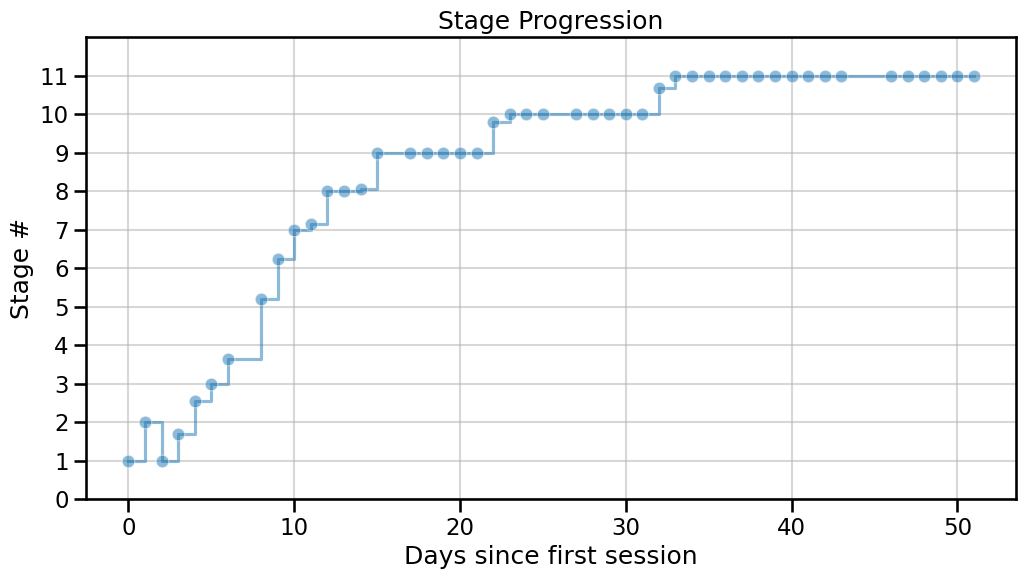

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
example_animal = "R035"
plot_stage(
    plot_stage_df.query("animal_id == @example_animal"),
    ax=ax,
    group="start_date",
    aesthetics=False,
    alpha=0.5,
    label=None,
)

max_stage = int(plot_stage_df.stage.max())
ax.grid(alpha=0.5)
_ = ax.set(
    ylabel="Stage #",
    title="Stage Progression",
    ylim=(0, max_stage + 1),
    yticks=range(max_stage + 1),
    xlabel="Days since first session",
)

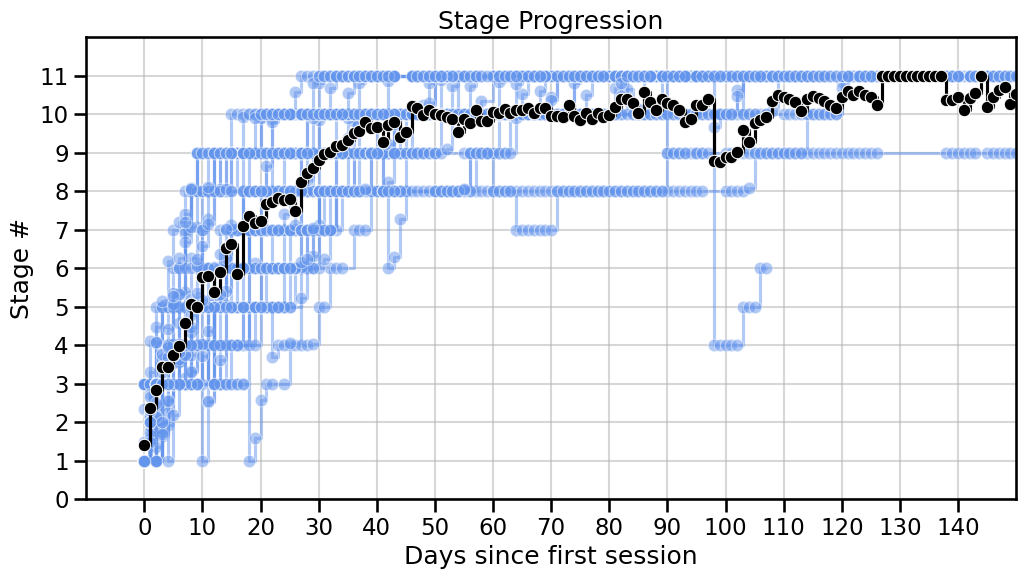

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
for animal_id, sub_df in plot_stage_df.groupby("animal_id"):
    plot_stage(
        sub_df,
        ax=ax,
        group="start_date",
        aesthetics=False,
        color="cornflowerblue",
        alpha=0.5,
        label=None,
    )

plot_stage(
    plot_stage_df,
    ax=ax,
    group="start_date",
    aesthetics=False,
    color="black",
)

max_stage = int(sub_df.stage.max())
ax.grid(alpha=0.5)
_ = ax.set(
    ylabel="Stage #",
    title="Stage Progression",
    ylim=(0, max_stage + 1),
    yticks=range(max_stage + 1),
    xlabel="Days since first session",
    xlim=(-10, 150),
    xticks=np.arange(stop=150, step=10),
)